In [130]:
import pandas as pd
import numpy as np
import sklearn.preprocessing, sklearn.decomposition,sklearn.linear_model, sklearn.pipeline, sklearn.metrics
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import nltk
%matplotlib inline

In [4]:
file = '/Users/rungsunan/code/kaggle/toxiccomment/train.csv'

In [5]:
df = pd.read_csv(file)

In [121]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,22256635,"Nonsense? kiss off, geek. what I said is true...",1,0,0,0,0,0
1,27450690,"""\n\n Please do not vandalize pages, as you di...",0,0,0,0,0,0
2,54037174,"""\n\n """"Points of interest"""" \n\nI removed the...",0,0,0,0,0,0
3,77493077,Asking some his nationality is a Racial offenc...,0,0,0,0,0,0
4,79357270,The reader here is not going by my say so for ...,0,0,0,0,0,0


In [25]:
df.describe()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,9.585100e+04,95851.000000,95851.000000,95851.000000,95851.000000,95851.000000,95851.000000
mean,4.994359e+11,0.096368,0.010068,0.053301,0.003182,0.049713,0.008492
std,2.890136e+11,0.295097,0.099832,0.224635,0.056320,0.217352,0.091762
min,2.225664e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.473437e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.001297e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.501088e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.999882e+11,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
df[['toxic']
   ].count()

toxic    95851
dtype: int64

In [79]:
columnshead = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']

In [92]:
plotlist

[9237, 965, 5109, 305, 4765, 814]

In [100]:
plotlist = []
for col in columnshead:
    plotlist.append(df[col].sum())
plotlist

[9237, 965, 5109, 305, 4765, 814]

In [102]:
y_pos = np.arange(len(columnshead))

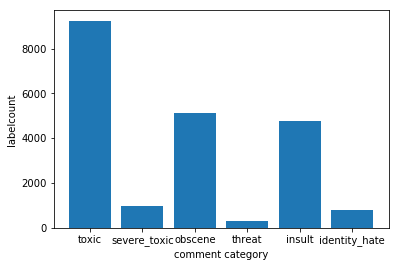

In [109]:
plt.bar(y_pos,plotlist,align='center')
plt.xticks(y_pos,columnshead)
plt.ylabel('labelcount')
plt.xlabel('comment category')

In [120]:
pd.crosstab([df.threat,df.insult,df.obscene,df.severe_toxic],df.toxic, margins=True)

toxic                                   0     1    All
threat insult obscene severe_toxic                    
0      0      0       0             86099  3498  89597
                      1                 0    25     25
              1       0               182  1080   1262
                      1                 0    97     97
       1      0       0               189   813   1002
                      1                 0    11     11
              1       0               128  2667   2795
                      1                 0   757    757
1      0      0       0                12    74     86
                      1                 0     8      8
              1       0                 1     8      9
                      1                 0     2      2
       1      0       0                 2    11     13
              1       0                 1   121    122
                      1                 0    65     65
All                                 86614  9237  95851

In [101]:
pd.crosstab(index=df['obscene'],columns=[ 'values'])

col_0,values
obscene,
0,90742
1,5109


In [110]:
pd.crosstab(df.toxic, df.severe_toxic, margins=True)

severe_toxic,0,1,All
toxic,,,
0,86614,0,86614
1,8272,965,9237
All,94886,965,95851


In [112]:
pd.crosstab(df.toxic, df.identity_hate, margins=True)

identity_hate,0,1,All
toxic,,,
0,86551,63,86614
1,8486,751,9237
All,95037,814,95851


In [128]:
df[['comment_text','toxic']]

,comment_text,toxic
0,"Nonsense? kiss off, geek. what I said is true...",1
1,"""\n\n Please do not vandalize pages, as you di...",0
2,"""\n\n """"Points of interest"""" \n\nI removed the...",0
3,Asking some his nationality is a Racial offenc...,0
4,The reader here is not going by my say so for ...,0
5,Fried chickens \n\nIs dat sum fried chickens?,0
6,Why can you put English for example on some pl...,0
7,Guy Fawkes \n\nim a resident in bridgwater and...,0
8,as far as nicknames go this article is embarra...,0
9,Woodland Meadows\nGood to hear that you correc...,0
